In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#setting the seed
random.seed(42)

In [2]:
#storing the dataframe ab_data.csv in df
df = pd.read_csv('ab_data.csv')
#using head() function to load firts five datapoints
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
row,cols = df.shape
print ("There are {} rows in the dataset".format(row))

There are 294478 rows in the dataset


In [4]:
unique_users = df['user_id'].nunique()
print ("There are {} unique users in the dataset".format(unique_users))

There are 290584 unique users in the dataset


In [5]:
converted_prop = sum(df['converted'].values)/row
print("The proportion of converted user is {}".format(converted_prop))

The proportion of converted user is 0.11965919355605512


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
print("By executing df.info(), we see that there are no missing values")

By executing df.info(), we see that there are no missing values


In [8]:
#we first need to find mismatch_treat_old which is
#number of times treatment group user lands incorrectly on old_page
mismatch_treat_old = df.query("group == 'treatment' and landing_page == 'old_page'")
print("No. of times treatment group user lands incorrectly on old_page is {}".format(len(mismatch_treat_old)))

# then no. of times where control group user incorrectly lands on new_page
mismatch_ctrl_new = df.query("group == 'control' and landing_page == 'new_page'")
print("No. of times control group user incorrectly lands on new_page is {}".format(len(mismatch_ctrl_new)))

#  number of times the new_page and treatment don't line up is sum of above two values
print("No.of times new_page and treatment don't line up is {}".format(len(mismatch_treat_old) + len(mismatch_ctrl_new)))

No. of times treatment group user lands incorrectly on old_page is 1965
No. of times control group user incorrectly lands on new_page is 1928
No.of times new_page and treatment don't line up is 3893


In [9]:
# Delete rows where there is treatment and old_page mismatch
# drop rows for mismatched treatment groups
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
# Delete rows where there is control and new_page mismatc
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [10]:
rows,cols = df.shape
print("After removing the mismatching in we have {} datapoints".format(rows))

After removing the mismatching in we have 290585 datapoints


In [11]:
#after cleaning the dataset as per reqirement we save the dataset to a new file
df.to_csv('ab_data_edited.csv', index=False)

In [12]:
df2 = pd.read_csv('ab_data_edited.csv')

In [13]:
df2[df2.duplicated(['user_id'], keep=False)] # checking for duplicated user ids

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
#Removing one of the row
#since we need to remove the duplicated value 
#we choose one with timestamp as "2017-01-09 05:37:58.781806"
#as timestamp is one field distinguishing both the points

time_dup = "2017-01-09 05:37:58.781806"
df2 = df2[df2.timestamp != time_dup]

In [15]:
df.iloc[1876]

user_id                             773192
timestamp       2017-01-09 05:37:58.781806
group                            treatment
landing_page                      new_page
converted                                0
Name: 1899, dtype: object

In [16]:
df2.iloc[1876]

user_id                             904789
timestamp       2017-01-05 18:56:06.947242
group                            treatment
landing_page                      new_page
converted                                0
Name: 1877, dtype: object

In [17]:
# There is a new data at the index 1876

In [18]:
print ("Using df2 , we find mean of the converted to get probability of an individual converting,that is\
       {}".format(df2['converted'].mean()))

Using df2 , we find mean of the converted to get probability of an individual converting,that is       0.11959708724499628


In [19]:
#Given that an individual was in the control group, what is the probability they converted?
ctr_grp_conv = df.query('group == "control"').converted.mean()
ctr_grp_conv

0.1203863045004612

In [20]:
#Given that an individual was in the treatment group, what is the probability they converted?
trt_grp_conv = df.query('group == "treatment"').converted.mean()
trt_grp_conv

0.11880724790277405

In [21]:
diff_grp_conv = ctr_grp_conv - trt_grp_conv
diff_grp_conv

0.0015790565976871451

In [22]:
#What is the probability that an individual received the new page?
P_new_page = (df2['landing_page'] == 'new_page').mean()
print("Probability that a person receives new page is : {}".format(P_new_page))

Probability that a person receives new page is : 0.5000619442226688


Given that an individual was in the treatment group, the probability they converted is 0.118807

Given that an individual was in the control group, the probability they converted is 0.120386

However, these results don't provide a solid evidence if one page leads to more conversions as we still don't know the significance of these results there are other factors such as Change aversion, test span durations and other potentially influencing factors are not accounted for.

##### Due of the time stamp associated with each event, we can technically run a hypothesis test continuously as each observation was observed.

A/B Test needs to be consistently performeed for a certain amount of time. But for time being we donot know answer to these questions.

1. For now, we need to make the decision just based on all the data provided. Initially we assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%. In this case we can state the hypothesis to be as :

Hypothesis :
H0 : pold >= pnew

H1 : pnew > pold

2. Assume under the null hypothesis,  pnew  and  pold  both have "true" success rates equal to the converted success rate regardless of page - that is  pnew  and  pold  are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.


Use a sample size for each page equal to the ones in ab_data.csv.


Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.

In [23]:
# calculating converted rates :
p_new = df2['converted'].mean()
p_new

0.11959708724499628

In [24]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

In [25]:
n_new = len(df2.query("group == 'treatment'"))
n_old = len(df2.query("group == 'control'"))

In [26]:
#Simulating  nnew  transactions with a convert rate of  pnew  under the null. Store these  nnew  1's and 0's in 
#new_page_converted.

new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted


array([0, 0, 0, ..., 0, 0, 0])

In [28]:
len(new_page_converted)

145310

In [29]:
len(old_page_converted)

145274

In [30]:
# since new_page_converted and old_page_converted have different sizes, we cannot directly compute p_diff
# since, differernce is only 36 values of thousands, we truncate the excess in new_page_converted

new_page_converted = new_page_converted[:145274]

In [31]:
len(new_page_converted)

145274

In [32]:
#Find  pnew  -  pold  for your simulated values

In [33]:
p_diff=new_page_converted.mean()-old_page_converted.mean()
p_diff

0.00016520506078170072

In [36]:
#Simulate 10,000  pnew  -  pold  values

p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    p_diffs.append(new_page_p - old_page_p)

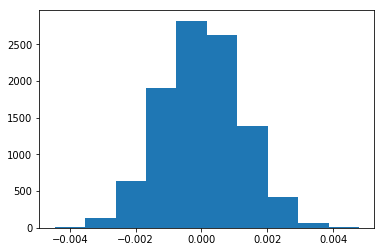

In [37]:
plt.hist(p_diffs);

In [38]:
# Calculate the actucl difference observed in ab_data

org_old_mean = df.query('group =="control"').converted.mean()
org_new_mean = df.query('group =="treatment"').converted.mean()
org_diff = org_new_mean - org_old_mean

# Convert p_diffs to array

p_diffs = np.array(p_diffs)

# Calculate the propotion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > org_diff).mean()

0.90580000000000005

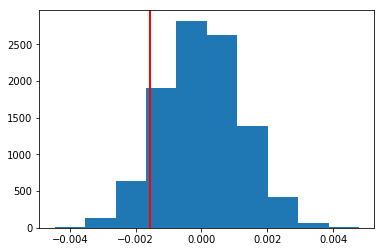

In [39]:
plt.hist(p_diffs);
plt.axvline(org_diff,c='r',linewidth = 2);

#### The value above represents the p-value of observing the statistic given the Null is true. As the p-value is large enough, we would fail to reject the Null hypothesis and keep the old page.

In [48]:
(p_diffs > org_diff).mean()

0.90580000000000005